 # Data preparation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [3]:
path = r'C:\Users\Natalie\Desktop\BDA TECHNION\פרויקט PYTHON'

In [4]:
churn = pd.read_csv("%s/churn.csv" % path)
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
churn.shape

(7043, 21)

In [6]:
df = churn.copy()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:

# check unique values of each column
for column in churn.columns:
    print('Column: {} - Unique Values: {}'.format(column, churn[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

In [8]:
churn = churn.rename(columns=str.lower)
churn

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
churn.loc[churn.churn == 'No', 'churn'] = 0
churn.loc[churn.churn == 'Yes', 'churn'] = 1
churn = churn.astype({"churn": 'int64'})   #   --> Change "Survived" to int



# Continue
customers = len(churn)
churn_customers = sum(churn['churn'])

# Print the output below using the "print" function
print("We have %d customers but only %d of them left (%f%%)" % (customers, churn_customers, (churn_customers/customers*100)))



We have 7043 customers but only 1869 of them left (26.536987%)


In [10]:
churn.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [11]:
churn.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [12]:

print(churn.groupby('gender').agg({'churn':['count','sum','mean']}))
print(churn.groupby('seniorcitizen').agg({'churn':['count','sum','mean']}))
print(churn.groupby('dependents').agg({'churn':['count','sum','mean']}))
print(churn.groupby('phoneservice').agg({'churn':['count','sum','mean']}))
print(churn.groupby('multiplelines').agg({'churn':['count','sum','mean']}))
print(churn.groupby('internetservice').agg({'churn':['count','sum','mean']}))
print(churn.groupby('onlinesecurity').agg({'churn':['count','sum','mean']}))
print(churn.groupby('onlinebackup').agg({'churn':['count','sum','mean']}))
print(churn.groupby('deviceprotection').agg({'churn':['count','sum','mean']}))
print(churn.groupby('techsupport').agg({'churn':['count','sum','mean']}))
print(churn.groupby('streamingtv').agg({'churn':['count','sum','mean']}))
print(churn.groupby('contract').agg({'churn':['count','sum','mean']}))
print(churn.groupby('paperlessbilling').agg({'churn':['count','sum','mean']}))
print(churn.groupby('paymentmethod').agg({'churn':['count','sum','mean']}))


       churn               
       count  sum      mean
gender                     
Female  3488  939  0.269209
Male    3555  930  0.261603
              churn                
              count   sum      mean
seniorcitizen                      
0              5901  1393  0.236062
1              1142   476  0.416813
           churn                
           count   sum      mean
dependents                      
No          4933  1543  0.312791
Yes         2110   326  0.154502
             churn                
             count   sum      mean
phoneservice                      
No             682   170  0.249267
Yes           6361  1699  0.267096
                 churn               
                 count  sum      mean
multiplelines                        
No                3390  849  0.250442
No phone service   682  170  0.249267
Yes               2971  850  0.286099
                churn                
                count   sum      mean
internetservice                     

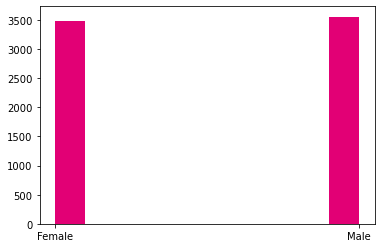

In [13]:
plt.hist(churn['gender'].dropna(),  color = '#e20075')
plt.show()



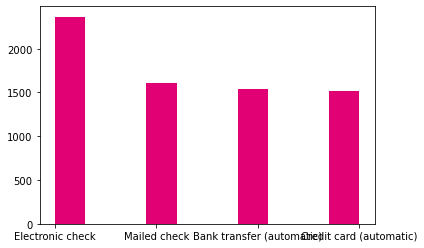

In [14]:

plt.hist(churn['paymentmethod'].dropna(),  color = '#e20075')
plt.show()

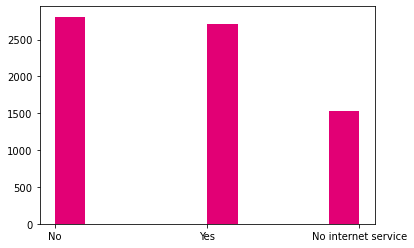

In [15]:
plt.hist(churn['streamingtv'].dropna(),  color = '#e20075')
plt.show()

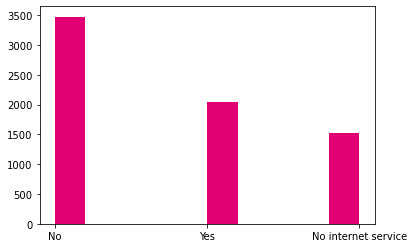

In [16]:
plt.hist(churn['techsupport'].dropna(),  color = '#e20075')
plt.show()
                              

In [17]:
churn['automaticpayment'] = '0'

churn.loc[(churn['paymentmethod'].str.contains('automatic')),"automaticpayment"] = '1'


churn



,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,automaticpayment
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,1
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1,0


                 churn                
                 count   sum      mean
automaticpayment                      
0                 3977  1379  0.346744
1                 3066   490  0.159817


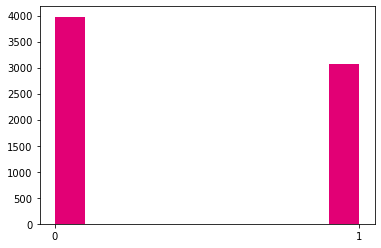

In [18]:
print(churn.groupby('automaticpayment').agg({'churn':['count','sum','mean']}))
plt.hist(churn['automaticpayment'].dropna(),  color = '#e20075')
plt.show()

# Exploratory Data Analysis and Data Cleaning

In [19]:
# transform the column TotalCharges into a numeric data type
churn['totalcharges'] = pd.to_numeric(churn['totalcharges'], errors='coerce')

In [20]:
# null observations of the TotalCharges column
churn[churn['totalcharges'].isnull()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,automaticpayment
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0,1
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0,1
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0,0


In [21]:
churn.dropna(inplace=True)

In [22]:
# remove (automatic) from payment method names
churn['paymentmethod'] = churn['paymentmethod'].str.replace(' (automatic)', '', regex=False)

In [23]:
# unique elements of the PaymentMethod column after the modification 
churn.paymentmethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [24]:
churn.loc[(churn['tenure'] <= 12),'tenurebyyeargroup'] = '1'
churn.loc[(churn['tenure'] > 12) &(churn['tenure'] <= 24),'tenurebyyeargroup'] = '2'
churn.loc[(churn['tenure'] > 24) & (churn['tenure'] <= 36),'tenurebyyeargroup'] = '3'
churn.loc[(churn['tenure'] > 36) & (churn['tenure'] <= 48),'tenurebyyeargroup'] = '4'
churn.loc[(churn['tenure'] > 48) & (churn['tenure'] <= 60),'tenurebyyeargroup'] = '5'
churn.loc[(churn['tenure'] > 60) & (churn['tenure'] <= 72),'tenurebyyeargroup'] = '6'

churn

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,automaticpayment,tenurebyyeargroup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,0,0,3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer,42.30,1840.75,0,1,4
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,0,2
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card,103.20,7362.90,0,1,6
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0,1
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,0,1


                  churn                
                  count   sum      mean
tenurebyyeargroup                      
1                  2175  1037  0.476782
2                  1024   294  0.287109
3                   832   180  0.216346
4                   762   145  0.190289
5                   832   120  0.144231
6                  1407    93  0.066098


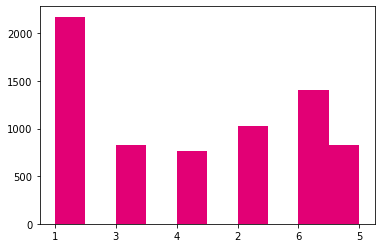

In [25]:
print(churn.groupby('tenurebyyeargroup').agg({'churn':['count','sum','mean']}))
plt.hist(churn['tenurebyyeargroup'].dropna(),  color = '#e20075')
plt.show()

In [26]:
churn.partner = (churn.partner=='Yes').astype('int')
churn.dependents = (churn.dependents=='Yes').astype('int')
churn.phoneservice = (churn.phoneservice=='Yes').astype('int')
churn.gender = (churn.gender=='Female').astype('int')
churn.paperlessbilling = (churn.paperlessbilling=='Yes').astype('int')
churn.automaticpayment = churn.automaticpayment.astype('int')
churn

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,automaticpayment,tenurebyyeargroup
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,...,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,1
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,...,No,No,One year,0,Mailed check,56.95,1889.50,0,0,3
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,...,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,0,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,...,No,No,One year,0,Bank transfer,42.30,1840.75,0,1,4
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,...,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0,0,2
7039,2234-XADUH,1,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,Yes,One year,1,Credit card,103.20,7362.90,0,1,6
7040,4801-JZAZL,1,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,Month-to-month,1,Electronic check,29.60,346.45,0,0,1
7041,8361-LTMKD,0,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,Month-to-month,1,Mailed check,74.40,306.60,1,0,1


In [27]:
churn = churn.drop(['customerid'], axis = 1)
print(churn.dtypes)

gender                 int32
seniorcitizen          int64
partner                int32
dependents             int32
tenure                 int64
phoneservice           int32
multiplelines         object
internetservice       object
onlinesecurity        object
onlinebackup          object
deviceprotection      object
techsupport           object
streamingtv           object
streamingmovies       object
contract              object
paperlessbilling       int32
paymentmethod         object
monthlycharges       float64
totalcharges         float64
churn                  int64
automaticpayment       int32
tenurebyyeargroup     object
dtype: object


In [28]:
churn['monthlychargegroup'] = 'Normal'

churn.loc[(churn['monthlycharges']<34.7) & (churn['automaticpayment']==0),'monthlychargegroup'] = 'low'
churn.loc[(churn['monthlycharges']>88.95) & (churn['automaticpayment']==0),'monthlychargegroup'] = 'high'

churn.loc[(churn['monthlycharges']<40.025) & (churn['automaticpayment']==1),'monthlychargegroup'] = 'low'
churn.loc[(churn['monthlycharges']>91.725) & (churn['automaticpayment']==1),'monthlychargegroup'] = 'high'


churn

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,...,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,automaticpayment,tenurebyyeargroup,monthlychargegroup
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,...,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,1,low
1,0,0,0,0,34,1,No,DSL,Yes,No,...,No,One year,0,Mailed check,56.95,1889.50,0,0,3,Normal
2,0,0,0,0,2,1,No,DSL,Yes,Yes,...,No,Month-to-month,1,Mailed check,53.85,108.15,1,0,1,Normal
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,...,No,One year,0,Bank transfer,42.30,1840.75,0,1,4,Normal
4,1,0,0,0,2,1,No,Fiber optic,No,No,...,No,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,Yes,DSL,Yes,No,...,Yes,One year,1,Mailed check,84.80,1990.50,0,0,2,Normal
7039,1,0,1,1,72,1,Yes,Fiber optic,No,Yes,...,Yes,One year,1,Credit card,103.20,7362.90,0,1,6,high
7040,1,0,1,1,11,0,No phone service,DSL,Yes,No,...,No,Month-to-month,1,Electronic check,29.60,346.45,0,0,1,low
7041,0,1,1,0,4,1,Yes,Fiber optic,No,No,...,No,Month-to-month,1,Mailed check,74.40,306.60,1,0,1,Normal


<AxesSubplot:>

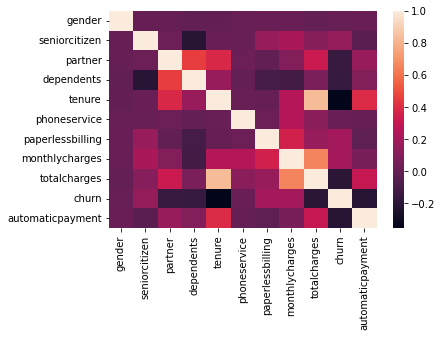

In [29]:
sns.heatmap(churn.corr())

<AxesSubplot:>

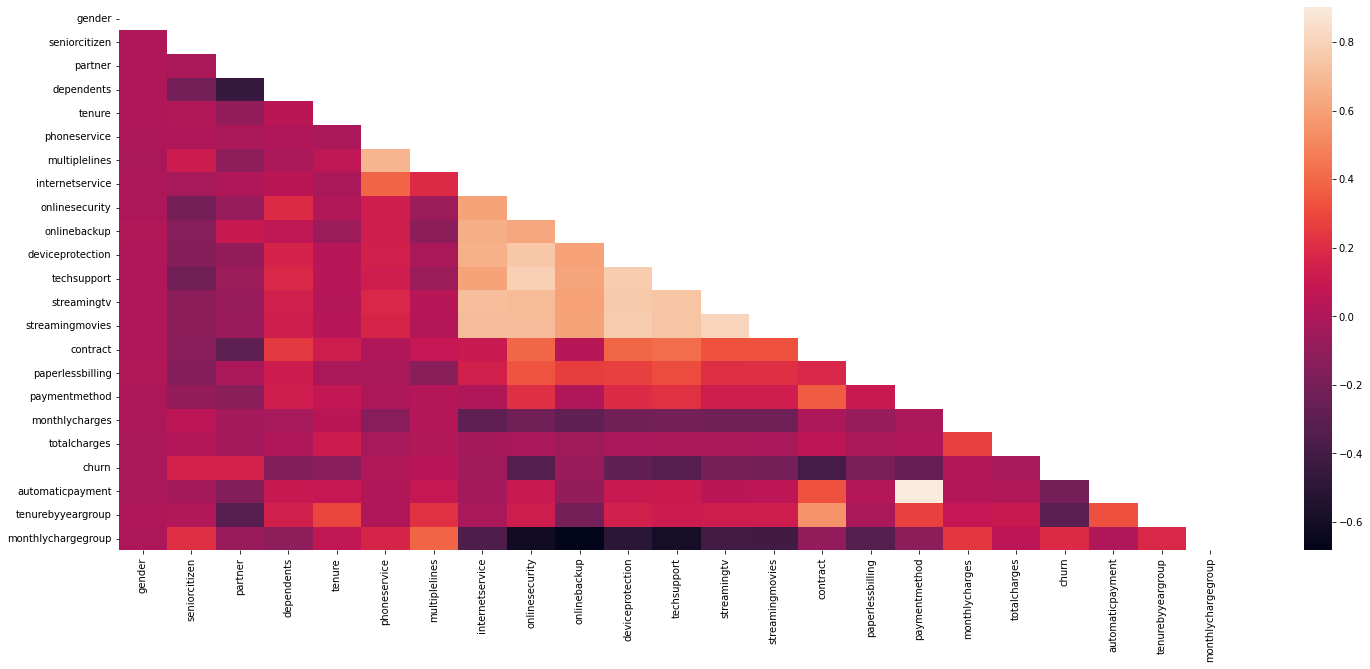

In [30]:
plt.figure(5, figsize=(25, 10))
corr = churn.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask)


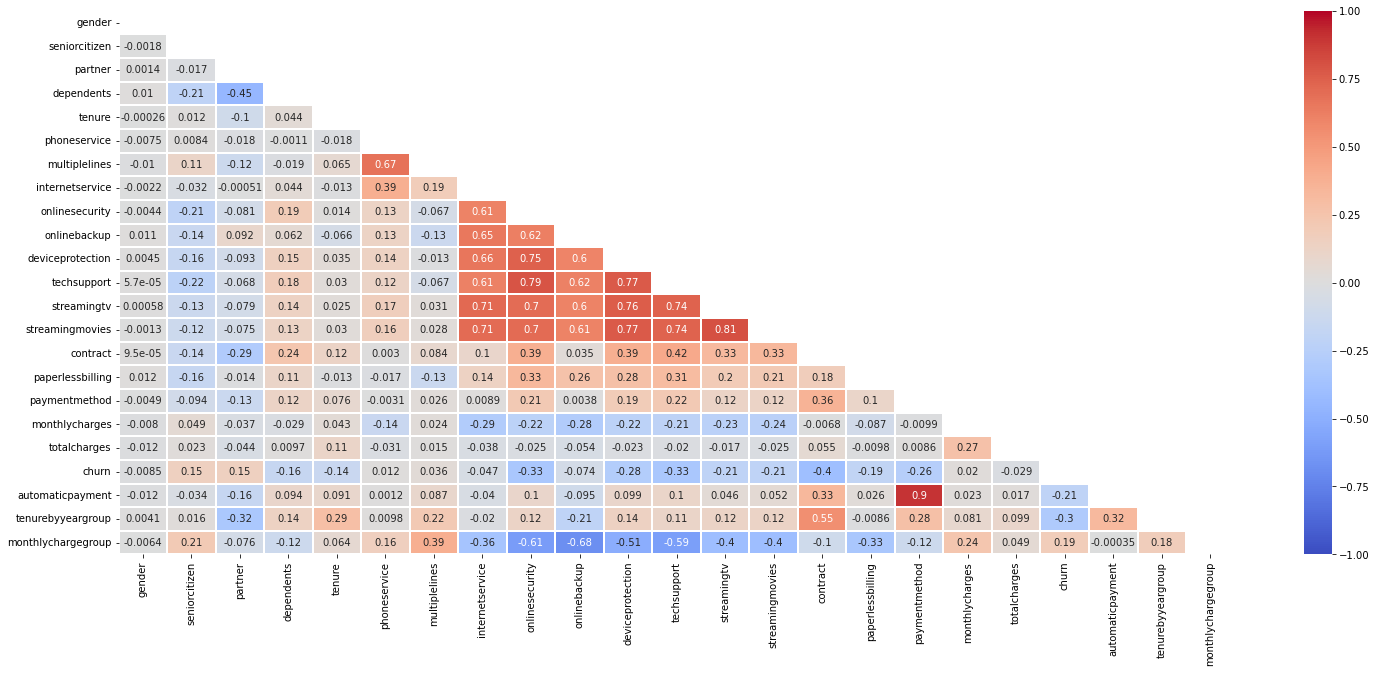

In [31]:
# Correlation between all variables
plt.figure(5, figsize=(25, 10))
corr = churn.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [32]:
corr

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,...,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,automaticpayment,tenurebyyeargroup,monthlychargegroup
gender,1.000000,-0.001819,0.001379,0.010349,-0.000265,-0.007515,-0.010284,-0.002236,-0.004365,0.011081,...,-0.001339,0.000095,0.011902,-0.004928,-0.008017,-0.012153,-0.008545,-0.011974,0.004139,-0.006441
seniorcitizen,-0.001819,1.000000,-0.016957,-0.210550,0.012240,0.008392,0.113769,-0.032160,-0.210546,-0.144762,...,-0.120658,-0.141820,-0.156258,-0.093712,0.049154,0.022949,0.150541,-0.033775,0.016018,0.208727
partner,0.001379,-0.016957,1.000000,-0.452269,-0.100513,-0.018397,-0.118037,-0.000513,-0.081078,0.091536,...,-0.075310,-0.294094,-0.013957,-0.133280,-0.036518,-0.044214,0.149982,-0.161327,-0.323011,-0.075700
dependents,0.010349,-0.210550,-0.452269,1.000000,0.044138,-0.001078,-0.019178,0.044030,0.188889,0.061970,...,0.125086,0.240556,0.110131,0.124002,-0.028706,0.009710,-0.163128,0.094464,0.139981,-0.117641
tenure,-0.000265,0.012240,-0.100513,0.044138,1.000000,-0.017864,0.064580,-0.012924,0.014436,-0.066232,...,0.030252,0.118664,-0.013160,0.075533,0.042605,0.112813,-0.143101,0.090751,0.286549,0.063980
phoneservice,-0.007515,0.008392,-0.018397,-0.001078,-0.017864,1.000000,0.674824,0.387266,0.125544,0.129432,...,0.164379,0.003019,-0.016696,-0.003106,-0.141696,-0.030534,0.011691,0.001159,0.009847,0.160767
multiplelines,-0.010284,0.113769,-0.118037,-0.019178,0.064580,0.674824,1.000000,0.186852,-0.066695,-0.130978,...,0.027944,0.084037,-0.133538,0.026248,0.024221,0.014915,0.036148,0.087410,0.217313,0.386768
internetservice,-0.002236,-0.032160,-0.000513,0.044030,-0.012924,0.387266,0.186852,1.000000,0.607412,0.650084,...,0.708336,0.099579,0.138166,0.008851,-0.288948,-0.037709,-0.047097,-0.040351,-0.019973,-0.358488
onlinesecurity,-0.004365,-0.210546,-0.081078,0.188889,0.014436,0.125544,-0.066695,0.607412,1.000000,0.621270,...,0.704672,0.389138,0.333656,0.214330,-0.219289,-0.024821,-0.332443,0.099794,0.121136,-0.612835
onlinebackup,0.011081,-0.144762,0.091536,0.061970,-0.066232,0.129432,-0.130978,0.650084,0.621270,1.000000,...,0.606037,0.034745,0.260691,0.003786,-0.283212,-0.053770,-0.073934,-0.094764,-0.206788,-0.683428


In [33]:
churn['monthlycharges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: monthlycharges, dtype: float64

In [34]:
churn['totalcharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: totalcharges, dtype: float64

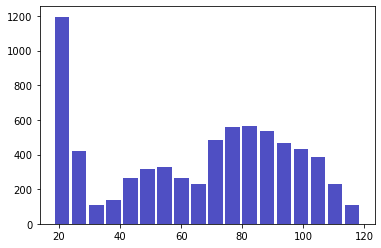

In [35]:
plt.hist(x=churn['monthlycharges'].dropna(), bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.show()

C:\Users\Natalie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monthlycharges', ylabel='Density'>

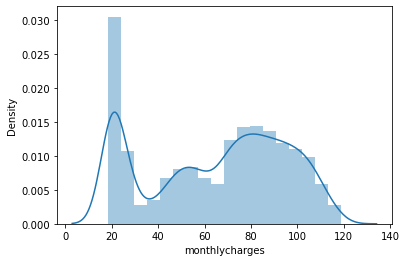

In [36]:
sns.distplot(churn['monthlycharges'])

In [37]:
bypaperlessbilling = churn.groupby('paperlessbilling')
bypaperlessbilling['monthlycharges'].describe()

,count,mean,std,min,25%,50%,75%,max
paperlessbilling,,,,,,,,
0,2864.0,52.025960,29.705423,18.25,20.45,50.2,78.20,118.60
1,4168.0,73.574532,27.052794,18.55,54.95,79.5,94.95,118.75


In [38]:
bypaymentmethod = churn.groupby('paymentmethod')
bypaymentmethod['monthlycharges'].describe()

,count,mean,std,min,25%,50%,75%,max
paymentmethod,,,,,,,,
Bank transfer,1542.0,67.205577,30.572447,18.40,41.0625,73.250,92.9875,118.75
Credit card,1521.0,66.519264,30.621316,18.25,38.6000,73.050,90.8500,117.50
Electronic check,2365.0,76.255814,24.053655,18.85,60.1500,80.550,94.7000,118.65
Mailed check,1604.0,43.958354,26.318624,18.70,20.1500,34.875,64.9125,118.60


In [39]:
byautomaticpayment = churn.groupby('automaticpayment')
byautomaticpayment['monthlycharges'].describe()

,count,mean,std,min,25%,50%,75%,max
automaticpayment,,,,,,,,
0,3969.0,63.203376,29.593601,18.70,34.700,69.80,88.950,118.65
1,3063.0,66.864773,30.593652,18.25,40.025,73.15,91.725,118.75


In [40]:
churn['monthlychargegroup'] = 'Normal'

churn.loc[(churn['monthlycharges']<34.7) & (churn['automaticpayment']==0),'monthlychargegroup'] = 'low'
churn.loc[(churn['monthlycharges']>88.95) & (churn['automaticpayment']==0),'monthlychargegroup'] = 'high'

churn.loc[(churn['monthlycharges']<40.025) & (churn['automaticpayment']==1),'monthlychargegroup'] = 'low'
churn.loc[(churn['monthlycharges']>91.725) & (churn['automaticpayment']==1),'monthlychargegroup'] = 'high'


churn

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,...,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,automaticpayment,tenurebyyeargroup,monthlychargegroup
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,...,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,1,low
1,0,0,0,0,34,1,No,DSL,Yes,No,...,No,One year,0,Mailed check,56.95,1889.50,0,0,3,Normal
2,0,0,0,0,2,1,No,DSL,Yes,Yes,...,No,Month-to-month,1,Mailed check,53.85,108.15,1,0,1,Normal
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,...,No,One year,0,Bank transfer,42.30,1840.75,0,1,4,Normal
4,1,0,0,0,2,1,No,Fiber optic,No,No,...,No,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,Yes,DSL,Yes,No,...,Yes,One year,1,Mailed check,84.80,1990.50,0,0,2,Normal
7039,1,0,1,1,72,1,Yes,Fiber optic,No,Yes,...,Yes,One year,1,Credit card,103.20,7362.90,0,1,6,high
7040,1,0,1,1,11,0,No phone service,DSL,Yes,No,...,No,Month-to-month,1,Electronic check,29.60,346.45,0,0,1,low
7041,0,1,1,0,4,1,Yes,Fiber optic,No,No,...,No,Month-to-month,1,Mailed check,74.40,306.60,1,0,1,Normal


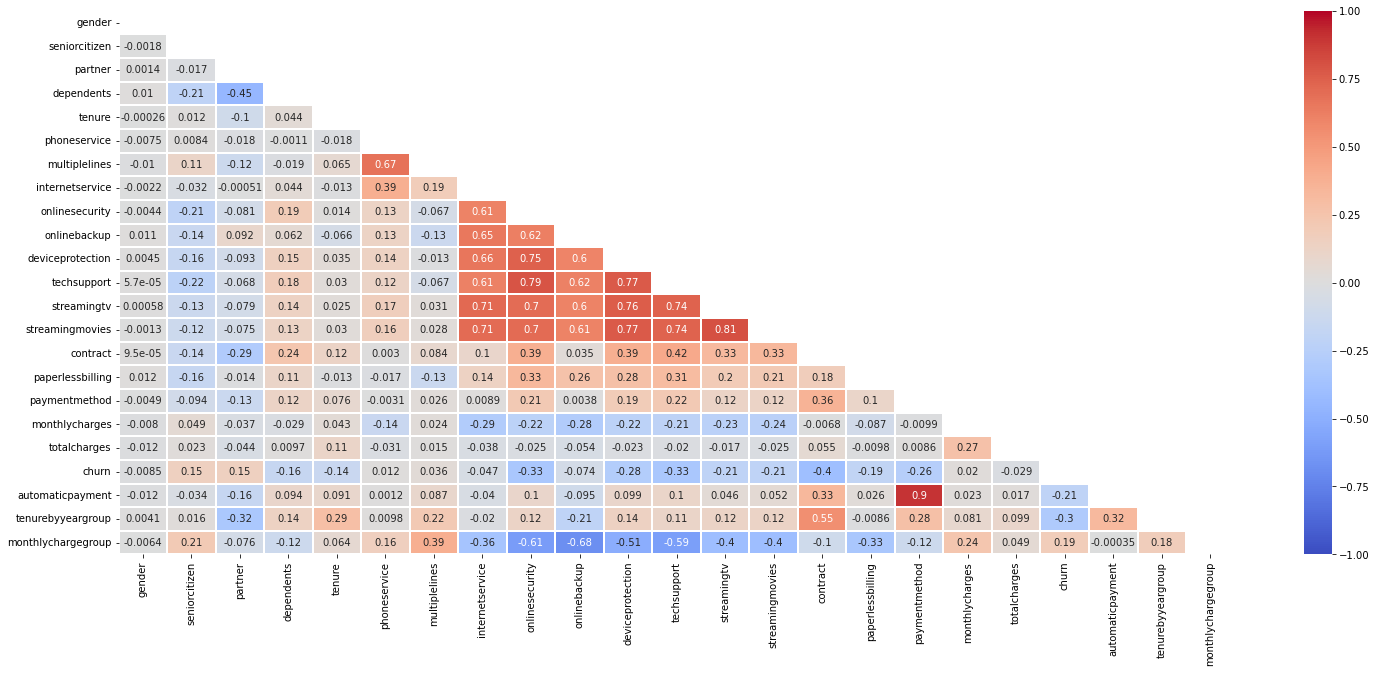

In [41]:
plt.figure(5, figsize=(25, 10))
corr = churn.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [42]:
churn.groupby(['seniorcitizen','paymentmethod']).agg({'churn':['count',sum,'mean']})

churn               
                               count  sum      mean
seniorcitizen paymentmethod                        
0             Bank transfer     1309  205  0.156608
              Credit card       1300  170  0.130769
              Electronic check  1771  754  0.425748
              Mailed check      1510  264  0.174834
1             Bank transfer      233   53  0.227468
              Credit card        221   62  0.280543
              Electronic check   594  317  0.533670
              Mailed check        94   44  0.468085

In [54]:
churn.groupby(['tenurebyyeargroup','contract']).agg({'churn':['count',sum,'mean']})

churn                
                                 count   sum      mean
tenurebyyeargroup contract                            
1                 Month-to-month  1994  1024  0.513541
                  One year         123    13  0.105691
                  Two year          58     0  0.000000
2                 Month-to-month   737   278  0.377205
                  One year         197    16  0.081218
                  Two year          90     0  0.000000
3                 Month-to-month   486   158  0.325103
                  One year         250    20  0.080000
                  Two year          96     2  0.020833
4                 Month-to-month   316   106  0.335443
                  One year         268    35  0.130597
                  Two year         178     4  0.022472
5                 Month-to-month   234    65  0.277778
                  One year         321    44  0.137072
                  Two year         277    11  0.039711
6                 Month-to-month   108    24  0.222222
                  One year         313    38  0.121406
                  Two year         986    31  0.031440

In [43]:
churn.groupby(['streamingmovies','onlinesecurity']).agg({'churn':['count',sum,'mean']})

churn               
                                        count  sum      mean
streamingmovies     onlinesecurity                          
No                  No                   1839  790  0.429581
                    Yes                   942  148  0.157113
No internet service No internet service  1520  113  0.074342
Yes                 No                   1658  671  0.404704
                    Yes                  1073  147  0.136999

In [44]:
churn.groupby(['internetservice','onlinesecurity']).agg({'churn':['count',sum,'mean']})

churn                
                                    count   sum      mean
internetservice onlinesecurity                           
DSL             No                   1240   347  0.279839
                Yes                  1176   112  0.095238
Fiber optic     No                   2257  1114  0.493576
                Yes                   839   183  0.218117
No              No internet service  1520   113  0.074342

In [45]:
churn.isnull().sum()

gender                0
seniorcitizen         0
partner               0
dependents            0
tenure                0
phoneservice          0
multiplelines         0
internetservice       0
onlinesecurity        0
onlinebackup          0
deviceprotection      0
techsupport           0
streamingtv           0
streamingmovies       0
contract              0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          0
churn                 0
automaticpayment      0
tenurebyyeargroup     0
monthlychargegroup    0
dtype: int64

In [46]:
churn.isna().sum()

gender                0
seniorcitizen         0
partner               0
dependents            0
tenure                0
phoneservice          0
multiplelines         0
internetservice       0
onlinesecurity        0
onlinebackup          0
deviceprotection      0
techsupport           0
streamingtv           0
streamingmovies       0
contract              0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          0
churn                 0
automaticpayment      0
tenurebyyeargroup     0
monthlychargegroup    0
dtype: int64

In [47]:
churn.head(10)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,...,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,automaticpayment,tenurebyyeargroup,monthlychargegroup
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,...,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,1,low
1,0,0,0,0,34,1,No,DSL,Yes,No,...,No,One year,0,Mailed check,56.95,1889.50,0,0,3,Normal
2,0,0,0,0,2,1,No,DSL,Yes,Yes,...,No,Month-to-month,1,Mailed check,53.85,108.15,1,0,1,Normal
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,...,No,One year,0,Bank transfer,42.30,1840.75,0,1,4,Normal
4,1,0,0,0,2,1,No,Fiber optic,No,No,...,No,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,Normal
5,1,0,0,0,8,1,Yes,Fiber optic,No,No,...,Yes,Month-to-month,1,Electronic check,99.65,820.50,1,0,1,high
6,0,0,0,1,22,1,Yes,Fiber optic,No,Yes,...,No,Month-to-month,1,Credit card,89.10,1949.40,0,1,2,Normal
7,1,0,0,0,10,0,No phone service,DSL,Yes,No,...,No,Month-to-month,0,Mailed check,29.75,301.90,0,0,1,low
8,1,0,1,0,28,1,Yes,Fiber optic,No,No,...,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1,0,3,high
9,0,0,0,1,62,1,No,DSL,Yes,Yes,...,No,One year,0,Bank transfer,56.15,3487.95,0,1,6,Normal


<AxesSubplot:>

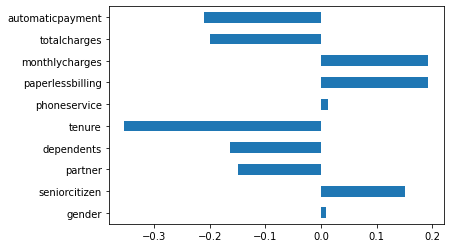

In [48]:
churn.corr()['churn'].drop('churn').plot(kind='barh')

There is a positive correlation between churn and the age of customers - most senior citizens churn. Maybe there is some campaign by competitors targeting the senior population.

Logically, longer tenure could also mean more loyalty and less churn risk.

It is also logical that more monthly charges can result in more churn risk.

However, it is interesting that total charges show a negative correlation to churn. The explanation can be that total charges also depend on the time the customer has spent with a company (tenure has a negative correlation). Also, it is questionable whether TotalCharges is an adequate variable to understand customer behavior and is it tracked by the customer.

A positive correlation between paperless billing and churn is something that needs extra exploring (not clear what can be divers for that behavior).

<br>
<br>
<hr class="dotted">
<br>
<br>

# Concatenating Attributes To Get Better Correlation With label

In [52]:
churn2 = churn.copy()
churn2.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn', 'automaticpayment',
       'tenurebyyeargroup', 'monthlychargegroup'],
      dtype='object')

In [53]:
churn2

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,...,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,automaticpayment,tenurebyyeargroup,monthlychargegroup
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,...,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,1,low
1,0,0,0,0,34,1,No,DSL,Yes,No,...,No,One year,0,Mailed check,56.95,1889.50,0,0,3,Normal
2,0,0,0,0,2,1,No,DSL,Yes,Yes,...,No,Month-to-month,1,Mailed check,53.85,108.15,1,0,1,Normal
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,...,No,One year,0,Bank transfer,42.30,1840.75,0,1,4,Normal
4,1,0,0,0,2,1,No,Fiber optic,No,No,...,No,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,Yes,DSL,Yes,No,...,Yes,One year,1,Mailed check,84.80,1990.50,0,0,2,Normal
7039,1,0,1,1,72,1,Yes,Fiber optic,No,Yes,...,Yes,One year,1,Credit card,103.20,7362.90,0,1,6,high
7040,1,0,1,1,11,0,No phone service,DSL,Yes,No,...,No,Month-to-month,1,Electronic check,29.60,346.45,0,0,1,low
7041,0,1,1,0,4,1,Yes,Fiber optic,No,No,...,No,Month-to-month,1,Mailed check,74.40,306.60,1,0,1,Normal


In [54]:
#selecting feturies with strong negative and strong positive correlation
#highly positive correlation 0.5-0.7, strong and perfect positive correlation 0.9-1.0. If there is a negative correlation, it will be represented by (-).
churn2['multiplelinesphoneservice'] = churn2['multiplelines'] + churn2['phoneservice'].astype(str)
churn2['onlinesecurityinternetservice'] = churn2['onlinesecurity'] + churn2['internetservice']
churn2['onlinebackupinternetservice'] = churn2['onlinebackup'] + churn2['internetservice']
churn2['onlinebackuponlinesecurity'] = churn2['onlinebackup'] + churn2['onlinesecurity']

churn2['deviceprotectiononlinesecurity'] = churn2['deviceprotection'] + churn2['onlinesecurity']
churn2['deviceprotectioninternetservice'] = churn2['deviceprotection'] + churn2['internetservice']
churn2['deviceprotectiononlinebackup'] = churn2['deviceprotection'] + churn2['onlinebackup']

churn2['techsupportonlinebackup'] = churn2['techsupport'] + churn2['onlinebackup']
churn2['techsupportinternetservice'] = churn2['techsupport'] + churn2['internetservice']
churn2['techsupportdeviceprotection'] = churn2['techsupport'] + churn2['deviceprotection']
churn2['techsupportonlinesecurity'] = churn2['techsupport'] + churn2['onlinesecurity']

churn2['streamingtvonlinesecurity'] = churn2['streamingtv'] + churn2['onlinesecurity']
churn2['streamingtvinternetservice'] = churn2['streamingtv'] + churn2['internetservice']
churn2['streamingtvonlinebackup'] = churn2['streamingtv'] + churn2['onlinebackup']
churn2['streamingtvdeviceprotection'] = churn2['streamingtv'] + churn2['deviceprotection']
churn2['streamingtvtechsupport'] = churn2['streamingtv'] + churn2['techsupport']

churn2['streamingmoviesonlinesecurity'] = churn2['streamingmovies'] + churn2['onlinesecurity']
churn2['streamingmoviesinternetservice'] = churn2['streamingmovies'] + churn2['internetservice']
churn2['streamingmoviesonlinebackup'] = churn2['streamingmovies'] + churn2['onlinebackup']
churn2['streamingmoviesdeviceprotection'] = churn2['streamingmovies'] + churn2['deviceprotection']
churn2['streamingmoviestechsupport'] = churn2['streamingmovies'] + churn2['techsupport']
churn2['streamingmoviesstreamingtv'] = churn2['streamingmovies'] + churn2['streamingtv']

churn2['monthlychargegroupmultiplelines'] = churn2['monthlychargegroup'] + churn2['multiplelines']
churn2['monthlychargegrouponlinesecurity'] = churn2['monthlychargegroup'] + churn2['onlinesecurity']
churn2['monthlychargegrouponlinebackup'] = churn2['monthlychargegroup'] + churn2['onlinebackup']
churn2['monthlychargegroupdeviceprotection'] = churn2['monthlychargegroup'] + churn2['deviceprotection']
churn2['monthlychargegrouptechsupport'] = churn2['monthlychargegroup'] + churn2['techsupport']



In [55]:
churn2.drop('onlinesecurity', inplace=True, axis=1)
churn2.drop('deviceprotection', inplace=True, axis=1)
churn2.drop('techsupport', inplace=True, axis=1)
churn2.drop('streamingtv', inplace=True, axis=1)
churn2.drop('streamingmovies', inplace=True, axis=1)
churn2.drop('onlinebackup', inplace=True, axis=1)
churn2.drop('multiplelines', inplace=True, axis=1)
churn2.drop('internetservice', inplace=True, axis=1)

In [56]:
churn2.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn', 'automaticpayment',
       'tenurebyyeargroup', 'monthlychargegroup', 'multiplelinesphoneservice',
       'onlinesecurityinternetservice', 'onlinebackupinternetservice',
       'onlinebackuponlinesecurity', 'deviceprotectiononlinesecurity',
       'deviceprotectioninternetservice', 'deviceprotectiononlinebackup',
       'techsupportonlinebackup', 'techsupportinternetservice',
       'techsupportdeviceprotection', 'techsupportonlinesecurity',
       'streamingtvonlinesecurity', 'streamingtvinternetservice',
       'streamingtvonlinebackup', 'streamingtvdeviceprotection',
       'streamingtvtechsupport', 'streamingmoviesonlinesecurity',
       'streamingmoviesinternetservice', 'streamingmoviesonlinebackup',
       'streamingmoviesdeviceprotection', 'streamingmoviestechsupport',
       'streamingmovie

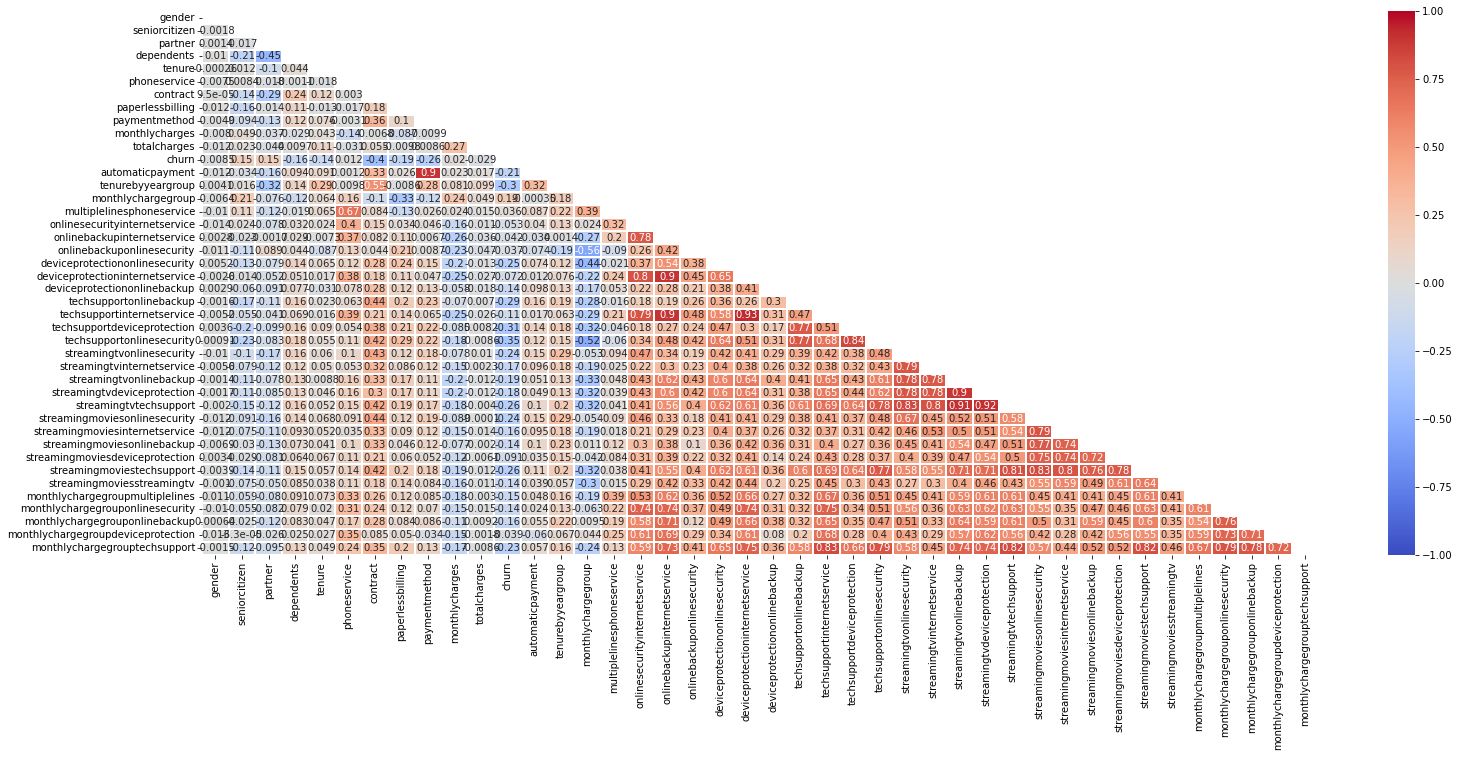

In [57]:
plt.figure(5, figsize=(25, 10))
corr = churn2.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [58]:
#'monthlychargegroupmultiplelines', 'monthlychargegrouponlinesecurity', 'monthlychargegrouponlinebackup',
#'monthlychargegroupdeviceprotection', 'monthlychargegrouptechsupport'
#churn.groupby(['monthlychargegroupmultiplelines']).agg({'churn':['count',sum,'mean']})
churn2

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,contract,paperlessbilling,paymentmethod,monthlycharges,...,streamingmoviesinternetservice,streamingmoviesonlinebackup,streamingmoviesdeviceprotection,streamingmoviestechsupport,streamingmoviesstreamingtv,monthlychargegroupmultiplelines,monthlychargegrouponlinesecurity,monthlychargegrouponlinebackup,monthlychargegroupdeviceprotection,monthlychargegrouptechsupport
0,1,0,1,0,1,0,Month-to-month,1,Electronic check,29.85,...,NoDSL,NoYes,NoNo,NoNo,NoNo,lowNo phone service,lowNo,lowYes,lowNo,lowNo
1,0,0,0,0,34,1,One year,0,Mailed check,56.95,...,NoDSL,NoNo,NoYes,NoNo,NoNo,NormalNo,NormalYes,NormalNo,NormalYes,NormalNo
2,0,0,0,0,2,1,Month-to-month,1,Mailed check,53.85,...,NoDSL,NoYes,NoNo,NoNo,NoNo,NormalNo,NormalYes,NormalYes,NormalNo,NormalNo
3,0,0,0,0,45,0,One year,0,Bank transfer,42.30,...,NoDSL,NoNo,NoYes,NoYes,NoNo,NormalNo phone service,NormalYes,NormalNo,NormalYes,NormalYes
4,1,0,0,0,2,1,Month-to-month,1,Electronic check,70.70,...,NoFiber optic,NoNo,NoNo,NoNo,NoNo,NormalNo,NormalNo,NormalNo,NormalNo,NormalNo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,One year,1,Mailed check,84.80,...,YesDSL,YesNo,YesYes,YesYes,YesYes,NormalYes,NormalYes,NormalNo,NormalYes,NormalYes
7039,1,0,1,1,72,1,One year,1,Credit card,103.20,...,YesFiber optic,YesYes,YesYes,YesNo,YesYes,highYes,highNo,highYes,highYes,highNo
7040,1,0,1,1,11,0,Month-to-month,1,Electronic check,29.60,...,NoDSL,NoNo,NoNo,NoNo,NoNo,lowNo phone service,lowYes,lowNo,lowNo,lowNo
7041,0,1,1,0,4,1,Month-to-month,1,Mailed check,74.40,...,NoFiber optic,NoNo,NoNo,NoNo,NoNo,NormalYes,NormalNo,NormalNo,NormalNo,NormalNo


In [62]:
churn2.groupby(['multiplelinesphoneservice']).agg({'churn':['count',sum,'mean']})

churn               
                                count  sum      mean
monthlychargegroupmultiplelines                     
NormalNo                         1787  599  0.335199
NormalNo phone service            444   94  0.211712
NormalYes                        1287  388  0.301476
highNo                            418  147  0.351675
highYes                          1340  452  0.337313
lowNo                            1180  103  0.087288
lowNo phone service               236   76  0.322034
lowYes                            340   10  0.029412

In [63]:
churn2.groupby(['onlinesecurityinternetservice']).agg({'churn':['count',sum,'mean']})

churn                
                              count   sum      mean
onlinesecurityinternetservice                      
No internet serviceNo          1520   113  0.074342
NoDSL                          1240   347  0.279839
NoFiber optic                  2257  1114  0.493576
YesDSL                         1176   112  0.095238
YesFiber optic                  839   183  0.218117

In [64]:
churn2.groupby(['onlinebackuponlinesecurity']).agg({'churn':['count',sum,'mean']})

churn                
                                       count   sum      mean
onlinebackuponlinesecurity                                  
No internet serviceNo internet service  1520   113  0.074342
NoNo                                    2195  1057  0.481549
NoYes                                    892   176  0.197309
YesNo                                   1302   404  0.310292
YesYes                                  1123   119  0.105966

In [65]:
churn2.groupby(['deviceprotectiononlinesecurity']).agg({'churn':['count',sum,'mean']})

churn                
                                       count   sum      mean
deviceprotectiononlinesecurity                              
No internet serviceNo internet service  1520   113  0.074342
NoNo                                    2187  1029  0.470508
NoYes                                    907   182  0.200662
YesNo                                   1310   432  0.329771
YesYes                                  1108   113  0.101986

In [66]:
churn2.groupby(['deviceprotectioninternetservice']).agg({'churn':['count',sum,'mean']})

churn               
                                count  sum      mean
deviceprotectioninternetservice                     
No internet serviceNo            1520  113  0.074342
NoDSL                            1355  342  0.252399
NoFiber optic                    1739  869  0.499712
YesDSL                           1061  117  0.110273
YesFiber optic                   1357  428  0.315402

In [67]:
churn2.groupby(['deviceprotectiononlinebackup']).agg({'churn':['count',sum,'mean']})

churn               
                                       count  sum      mean
deviceprotectiononlinebackup                               
No internet serviceNo internet service  1520  113  0.074342
NoNo                                    1984  911  0.459173
NoYes                                   1110  300  0.270270
YesNo                                   1103  322  0.291931
YesYes                                  1315  223  0.169582

In [68]:
churn2.groupby(['techsupportonlinebackup']).agg({'churn':['count',sum,'mean']})

churn                
                                       count   sum      mean
techsupportonlinebackup                                     
No internet serviceNo internet service  1520   113  0.074342
NoNo                                    2196  1049  0.477687
NoYes                                   1276   397  0.311129
YesNo                                    891   184  0.206510
YesYes                                  1149   126  0.109661

In [69]:
churn2.groupby(['techsupportinternetservice']).agg({'churn':['count',sum,'mean']})

churn                
                           count   sum      mean
techsupportinternetservice                      
No internet serviceNo       1520   113  0.074342
NoDSL                       1242   345  0.277778
NoFiber optic               2230  1101  0.493722
YesDSL                      1174   114  0.097104
YesFiber optic               866   196  0.226328

In [70]:
churn2.groupby(['techsupportdeviceprotection']).agg({'churn':['count',sum,'mean']})

churn                
                                       count   sum      mean
techsupportdeviceprotection                                 
No internet serviceNo internet service  1520   113  0.074342
NoNo                                    2260  1048  0.463717
NoYes                                   1212   398  0.328383
YesNo                                    834   163  0.195444
YesYes                                  1206   147  0.121891

In [71]:
churn2.groupby(['techsupportonlinesecurity']).agg({'churn':['count',sum,'mean']})

churn                
                                       count   sum      mean
techsupportonlinesecurity                                   
No internet serviceNo internet service  1520   113  0.074342
NoNo                                    2553  1250  0.489620
NoYes                                    919   196  0.213275
YesNo                                    944   211  0.223517
YesYes                                  1096    99  0.090328

In [73]:
print(churn2.groupby(['streamingtvonlinesecurity']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['streamingtvinternetservice']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['streamingtvonlinebackup']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['streamingtvdeviceprotection']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['streamingtvtechsupport']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['streamingmoviesonlinesecurity']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['streamingmoviesinternetservice']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['streamingmoviesonlinebackup']).agg({'churn':['count',sum,'mean']}))

print(churn2.groupby(['streamingmoviesdeviceprotection']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['streamingmoviestechsupport']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['streamingmoviesstreamingtv']).agg({'churn':['count',sum,'mean']}))

print(churn2.groupby(['monthlychargegroupmultiplelines']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['monthlychargegrouponlinesecurity']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['monthlychargegrouponlinebackup']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['monthlychargegroupdeviceprotection']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['monthlychargegrouptechsupport']).agg({'churn':['count',sum,'mean']}))    
  

                                       churn               
                                       count  sum      mean
streamingtvonlinesecurity                                  
No internet serviceNo internet service  1520  113  0.074342
NoNo                                    1840  798  0.433696
NoYes                                    969  144  0.148607
YesNo                                   1657  663  0.400121
YesYes                                  1046  151  0.144359
                           churn               
                           count  sum      mean
streamingtvinternetservice                     
No internet serviceNo       1520  113  0.074342
NoDSL                       1463  332  0.226931
NoFiber optic               1346  610  0.453195
YesDSL                       953  127  0.133263
YesFiber optic              1750  687  0.392571
                                       churn               
                                       count  sum      mean
streamingtvonlin

In [74]:
 
print(churn2.groupby(['seniorcitizen','streamingtvonlinesecurity']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['seniorcitizen','streamingtvinternetservice']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['seniorcitizen','streamingtvonlinebackup']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['seniorcitizen','streamingtvdeviceprotection']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['seniorcitizen','streamingtvtechsupport']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['seniorcitizen','streamingmoviesonlinesecurity']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['seniorcitizen','streamingmoviesinternetservice']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['seniorcitizen','streamingmoviesonlinebackup']).agg({'churn':['count',sum,'mean']}))

print(churn2.groupby(['seniorcitizen','streamingmoviesdeviceprotection']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['seniorcitizen','streamingmoviestechsupport']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['seniorcitizen','streamingmoviesstreamingtv']).agg({'churn':['count',sum,'mean']}))

print(churn2.groupby(['seniorcitizen','monthlychargegroupmultiplelines']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['seniorcitizen','monthlychargegrouponlinesecurity']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['seniorcitizen','monthlychargegrouponlinebackup']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['seniorcitizen','monthlychargegroupdeviceprotection']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['seniorcitizen','monthlychargegrouptechsupport']).agg({'churn':['count',sum,'mean']}))    

                                                     churn               
                                                     count  sum      mean
seniorcitizen streamingtvonlinesecurity                                  
0             No internet serviceNo internet service  1468  108  0.073569
              NoNo                                    1452  586  0.403581
              NoYes                                    839  114  0.135876
              YesNo                                   1237  468  0.378335
              YesYes                                   894  117  0.130872
1             No internet serviceNo internet service    52    5  0.096154
              NoNo                                     388  212  0.546392
              NoYes                                    130   30  0.230769
              YesNo                                    420  195  0.464286
              YesYes                                   152   34  0.223684
                                      

In [75]:


print(churn2.groupby(['partner','streamingtvonlinesecurity']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['partner','streamingtvinternetservice']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['partner','streamingtvonlinebackup']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['partner','streamingtvdeviceprotection']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['partner','streamingtvtechsupport']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['partner','streamingmoviesonlinesecurity']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['partner','streamingmoviesinternetservice']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['partner','streamingmoviesonlinebackup']).agg({'churn':['count',sum,'mean']}))

print(churn2.groupby(['partner','streamingmoviesdeviceprotection']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['partner','streamingmoviestechsupport']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['partner','streamingmoviesstreamingtv']).agg({'churn':['count',sum,'mean']}))

print(churn2.groupby(['partner','monthlychargegroupmultiplelines']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['partner','monthlychargegrouponlinesecurity']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['partner','monthlychargegrouponlinebackup']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['partner','monthlychargegroupdeviceprotection']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['partner','monthlychargegrouptechsupport']).agg({'churn':['count',sum,'mean']}))    

                                               churn               
                                               count  sum      mean
partner streamingtvonlinesecurity                                  
0       No internet serviceNo internet service   787   84  0.106734
        NoNo                                    1205  566  0.469710
        NoYes                                    461   87  0.188720
        YesNo                                    832  394  0.473558
        YesYes                                   354   69  0.194915
1       No internet serviceNo internet service   733   29  0.039563
        NoNo                                     635  232  0.365354
        NoYes                                    508   57  0.112205
        YesNo                                    825  269  0.326061
        YesYes                                   692   82  0.118497
                                   churn               
                                   count  sum      mean
part

In [76]:


print(churn2.groupby(['dependents','streamingtvonlinesecurity']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['dependents','streamingtvinternetservice']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['dependents','streamingtvonlinebackup']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['dependents','streamingtvdeviceprotection']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['dependents','streamingtvtechsupport']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['dependents','streamingmoviesonlinesecurity']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['dependents','streamingmoviesinternetservice']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['dependents','streamingmoviesonlinebackup']).agg({'churn':['count',sum,'mean']}))

print(churn2.groupby(['dependents','streamingmoviesdeviceprotection']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['dependents','streamingmoviestechsupport']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['dependents','streamingmoviesstreamingtv']).agg({'churn':['count',sum,'mean']}))

print(churn2.groupby(['dependents','monthlychargegroupmultiplelines']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['dependents','monthlychargegrouponlinesecurity']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['dependents','monthlychargegrouponlinebackup']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['dependents','monthlychargegroupdeviceprotection']).agg({'churn':['count',sum,'mean']}))
print(churn2.groupby(['dependents','monthlychargegrouptechsupport']).agg({'churn':['count',sum,'mean']}))    

                                                  churn               
                                                  count  sum      mean
dependents streamingtvonlinesecurity                                  
0          No internet serviceNo internet service   883   85  0.096263
           NoNo                                    1479  673  0.455037
           NoYes                                    649  115  0.177196
           YesNo                                   1275  559  0.438431
           YesYes                                   647  111  0.171561
1          No internet serviceNo internet service   637   28  0.043956
           NoNo                                     361  125  0.346260
           NoYes                                    320   29  0.090625
           YesNo                                    382  104  0.272251
           YesYes                                   399   40  0.100251
                                      churn               
                  

In [70]:

# We'll use the "get_dummies" method to change the variables to "one hot"
# "one hot" encoding is a representation of categorical variables as binary vectors
churn = pd.get_dummies(churn)
churn

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,...,paymentmethod_Bank transfer,paymentmethod_Credit card,paymentmethod_Electronic check,paymentmethod_Mailed check,tenurebyyeargroup_1,tenurebyyeargroup_2,tenurebyyeargroup_3,tenurebyyeargroup_4,tenurebyyeargroup_5,tenurebyyeargroup_6
0,1,0,1,0,1,0,1,29.85,29.85,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84.80,1990.50,0,...,0,0,0,1,0,1,0,0,0,0
7039,1,0,1,1,72,1,1,103.20,7362.90,0,...,0,1,0,0,0,0,0,0,0,1
7040,1,0,1,1,11,0,1,29.60,346.45,0,...,0,0,1,0,1,0,0,0,0,0
7041,0,1,1,0,4,1,1,74.40,306.60,1,...,0,0,0,1,1,0,0,0,0,0


In [71]:
churn.dtypes

gender                                    int32
seniorcitizen                             int64
partner                                   int32
dependents                                int32
tenure                                    int64
phoneservice                              int32
paperlessbilling                          int32
monthlycharges                          float64
totalcharges                            float64
churn                                     int64
automaticpayment                          int32
multiplelines_No                          uint8
multiplelines_No phone service            uint8
multiplelines_Yes                         uint8
internetservice_DSL                       uint8
internetservice_Fiber optic               uint8
internetservice_No                        uint8
onlinesecurity_No                         uint8
onlinesecurity_No internet service        uint8
onlinesecurity_Yes                        uint8
onlinebackup_No                         

In [72]:
churn.isna().mean()

gender                                  0.0
seniorcitizen                           0.0
partner                                 0.0
dependents                              0.0
tenure                                  0.0
phoneservice                            0.0
paperlessbilling                        0.0
monthlycharges                          0.0
totalcharges                            0.0
churn                                   0.0
automaticpayment                        0.0
multiplelines_No                        0.0
multiplelines_No phone service          0.0
multiplelines_Yes                       0.0
internetservice_DSL                     0.0
internetservice_Fiber optic             0.0
internetservice_No                      0.0
onlinesecurity_No                       0.0
onlinesecurity_No internet service      0.0
onlinesecurity_Yes                      0.0
onlinebackup_No                         0.0
onlinebackup_No internet service        0.0
onlinebackup_Yes                

# Finding interesting relationships

0    0.734215
1    0.265785
Name: churn, dtype: float64

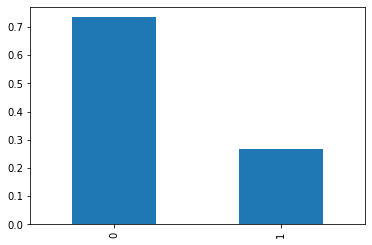

In [73]:
churn.churn.value_counts(normalize=True).plot(kind='bar');
churn.churn.value_counts(normalize=True)

In [74]:
churn.describe()


,gender,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,...,paymentmethod_Bank transfer,paymentmethod_Credit card,paymentmethod_Electronic check,paymentmethod_Mailed check,tenurebyyeargroup_1,tenurebyyeargroup_2,tenurebyyeargroup_3,tenurebyyeargroup_4,tenurebyyeargroup_5,tenurebyyeargroup_6
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.00000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785,...,0.219283,0.216297,0.336320,0.228100,0.309300,0.14562,0.118316,0.108362,0.118316,0.200085
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782,...,0.413790,0.411748,0.472483,0.419637,0.462238,0.35275,0.323005,0.310859,0.323005,0.400092
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
